In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [4]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [5]:
# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Split the dataset into features (X) and target labels (y)
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Classification Algorithms
classifiers = [
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42))
]

for name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train_scaled, y_train)

    # Predict the target labels
    y_pred = classifier.predict(X_test_scaled)

    # Calculate the accuracy and display classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

    print(f"{name} - Accuracy: {accuracy}")
    print(f"{name} - Classification Report:\n{classification_rep}")

K-Nearest Neighbors - Accuracy: 1.0
K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree - Accuracy: 1.0
Decision Tree - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest - Accuracy: 1.0
Random Forest - Classification Report:
              preci

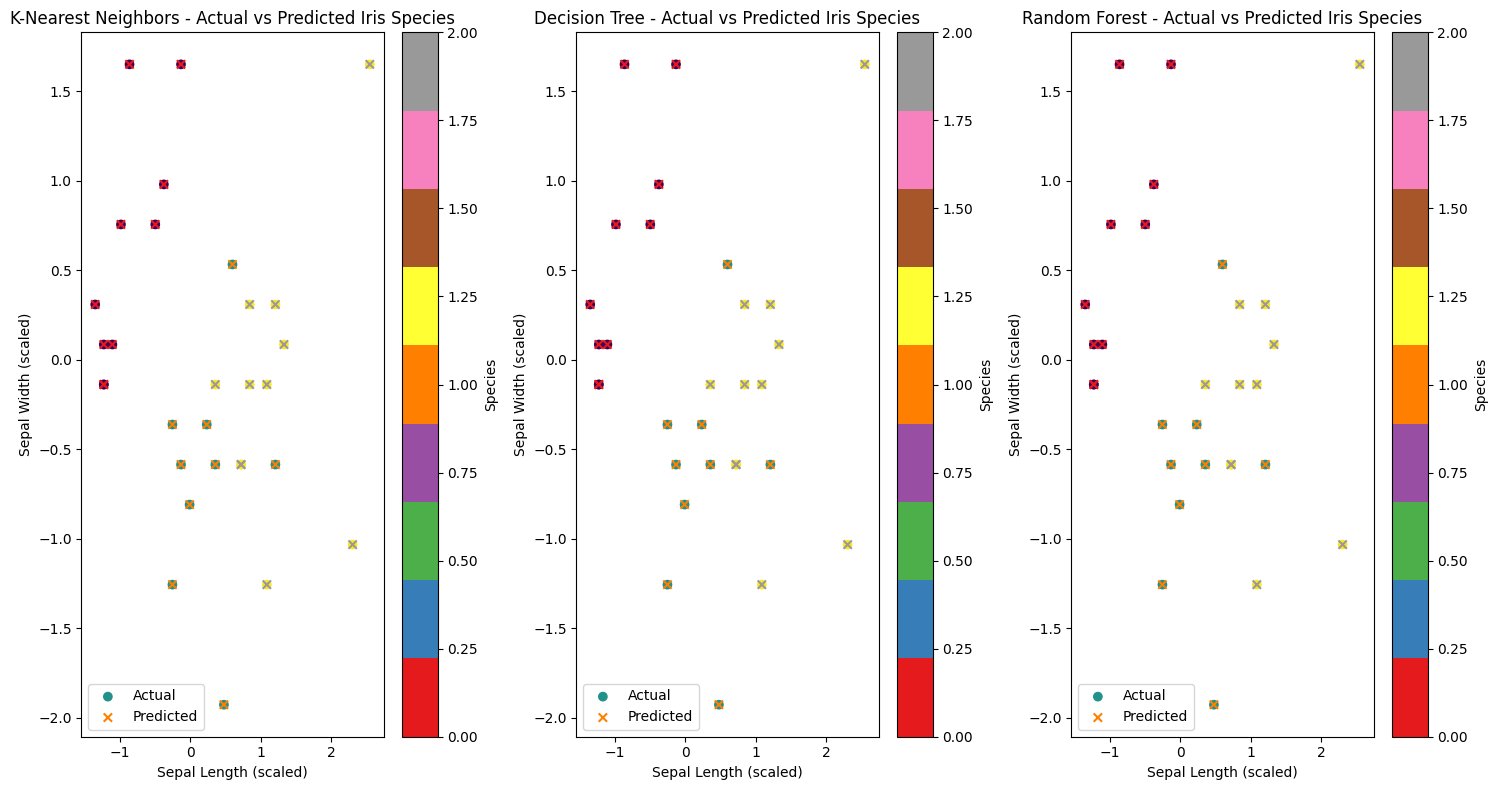

In [10]:
# Visualization: Plotting the actual and predicted species
plt.figure(figsize=(15, 8))
for i, (name, classifier) in enumerate(classifiers, 1):
    plt.subplot(1, 3, i)
    y_pred = classifier.predict(X_test_scaled)
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', label='Actual')
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, marker='x', cmap='Set1', label='Predicted')
    plt.xlabel('Sepal Length (scaled)')
    plt.ylabel('Sepal Width (scaled)')
    plt.title(f'{name} - Actual vs Predicted Iris Species')
    plt.colorbar(label='Species')
    plt.legend()

plt.tight_layout()
plt.show()

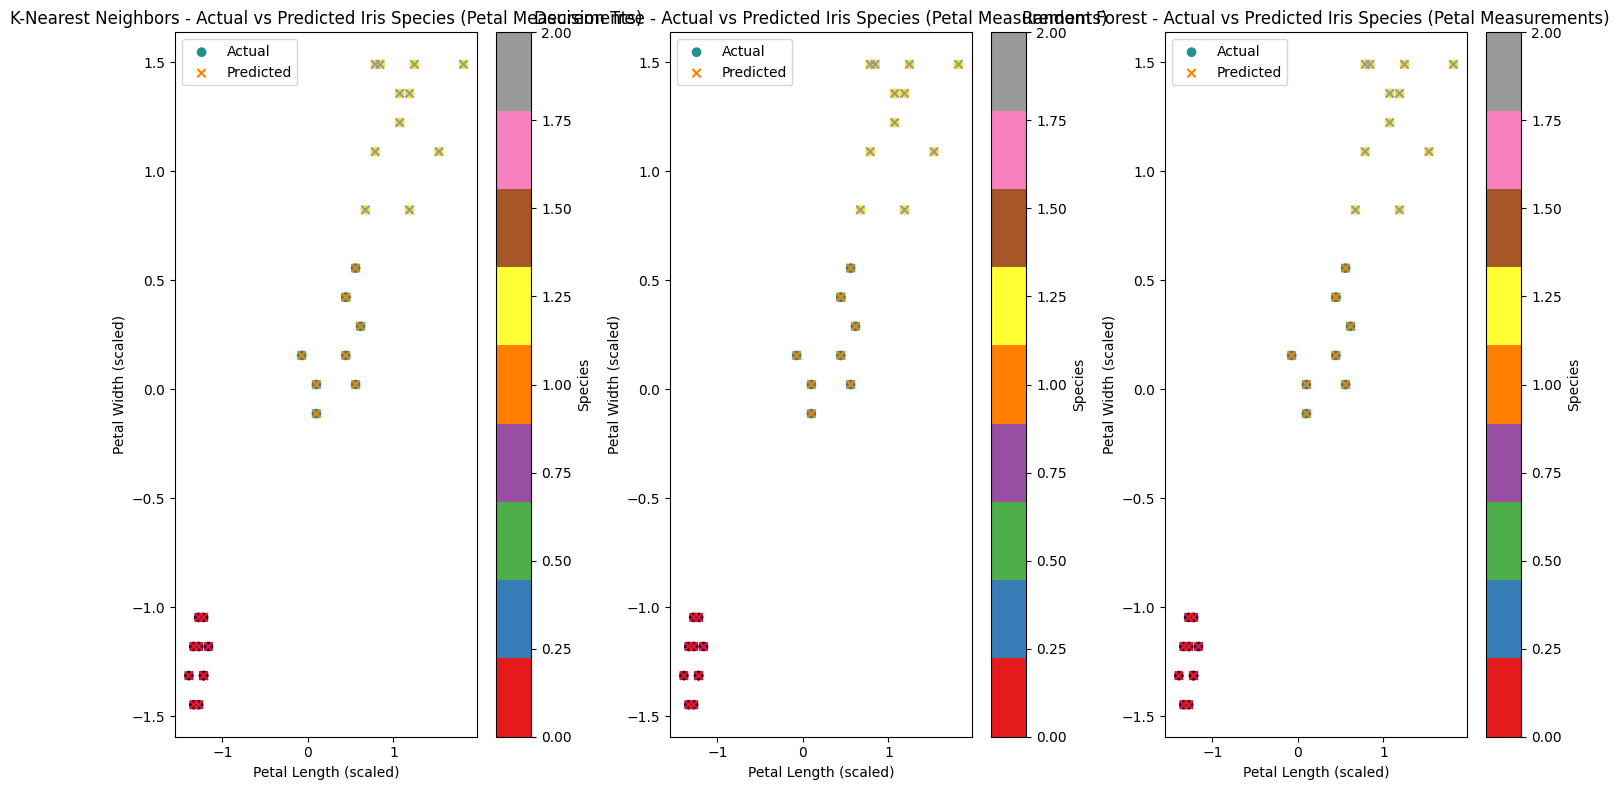

In [13]:
# Visualization: Scatter plots for petal measurements
plt.figure(figsize=(15, 8))
for i, (name, classifier) in enumerate(classifiers, 1):
    plt.subplot(1, 3, i)
    y_pred = classifier.predict(X_test_scaled)
    plt.scatter(X_test_scaled[:, 2], X_test_scaled[:, 3], c=y_test, cmap='viridis', label='Actual')
    plt.scatter(X_test_scaled[:, 2], X_test_scaled[:, 3], c=y_pred, marker='x', cmap='Set1', label='Predicted')
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')
    plt.title(f'{name} - Actual vs Predicted Iris Species (Petal Measurements)')
    plt.colorbar(label='Species')
    plt.legend()

plt.tight_layout()
plt.show()


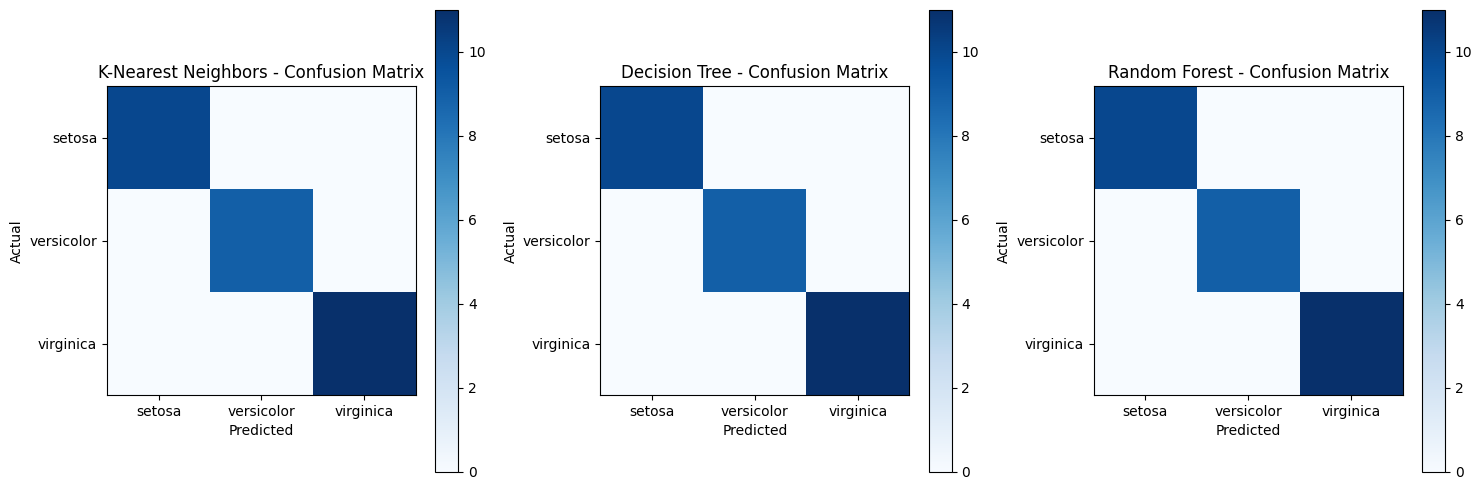

In [14]:
# Visualization: Confusion matrices
plt.figure(figsize=(15, 5))
for i, (name, classifier) in enumerate(classifiers, 1):
    plt.subplot(1, 3, i)
    y_pred = classifier.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(np.arange(3), iris.target_names)
    plt.yticks(np.arange(3), iris.target_names)
    plt.colorbar()

plt.tight_layout()
plt.show()
